# TENSORFLOW NOTEBOOK

### Note: I this notebook I am not using much of pre-defined libraries, I tried to code everything manually.

In [1]:
### Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Importing dataset as dataframe

dataset = pd.read_csv("/Football/train.csv")

In [3]:
dataset.head()

,AC,AF,AR,AS,AST,AY,AwayTeam,Date,FTR,HC,HF,HR,HS,HST,HTAG,HTHG,HY,HomeTeam,league
0,3.0,12.0,0.0,14.0,4.0,0.0,Stuttgart,07/08/09,H,6.0,12.0,0.0,13.0,7.0,0.0,0.0,0.0,Wolfsburg,bundesliga
1,1.0,10.0,0.0,7.0,0.0,1.0,FC Koln,08/08/09,H,16.0,8.0,0.0,24.0,11.0,0.0,0.0,0.0,Dortmund,bundesliga
2,3.0,20.0,0.0,15.0,3.0,2.0,Hannover,08/08/09,H,5.0,16.0,0.0,10.0,4.0,0.0,0.0,3.0,Hertha,bundesliga
3,10.0,28.0,0.0,9.0,3.0,2.0,Bayern Munich,08/08/09,D,3.0,10.0,0.0,9.0,1.0,1.0,1.0,0.0,Hoffenheim,bundesliga
4,5.0,28.0,0.0,13.0,7.0,2.0,Leverkusen,08/08/09,D,3.0,22.0,0.0,8.0,4.0,2.0,1.0,1.0,Mainz,bundesliga


In [4]:
## Checking for null values in dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12789 entries, 0 to 12788
Data columns (total 19 columns):
AC          12780 non-null float64
AF          12778 non-null float64
AR          12780 non-null float64
AS          12780 non-null float64
AST         12780 non-null float64
AY          12780 non-null float64
AwayTeam    12782 non-null object
Date        12782 non-null object
FTR         12782 non-null object
HC          12780 non-null float64
HF          12778 non-null float64
HR          12780 non-null float64
HS          12780 non-null float64
HST         12780 non-null float64
HTAG        12779 non-null float64
HTHG        12779 non-null float64
HY          12779 non-null float64
HomeTeam    12782 non-null object
league      12789 non-null object
dtypes: float64(14), object(5)
memory usage: 1.9+ MB


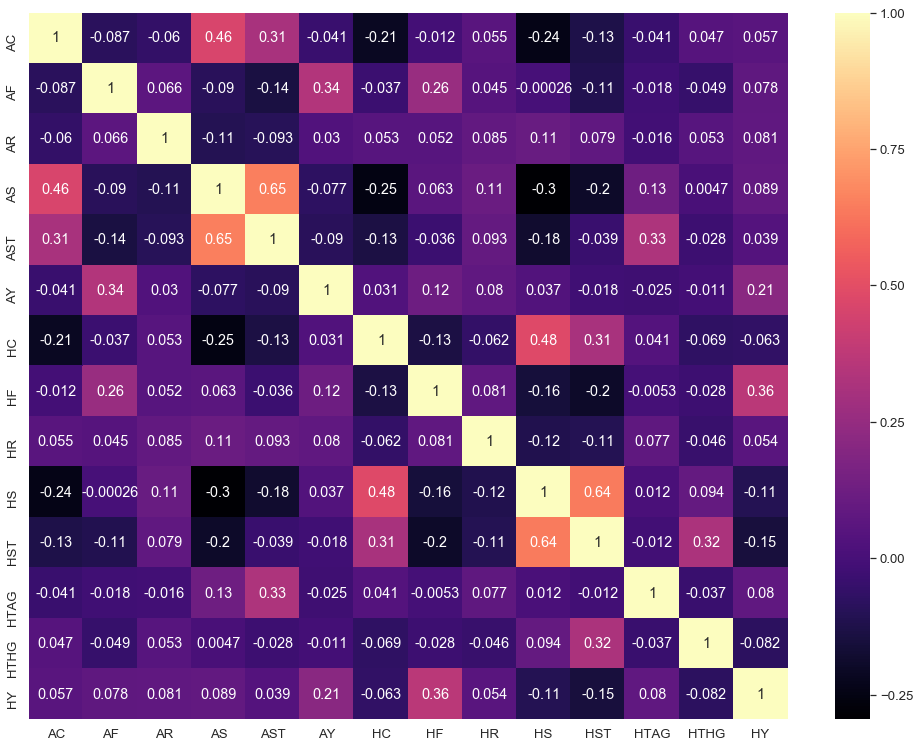

In [5]:
## Lets check the correlation between attributes

plt.figure(figsize = (17 , 13))
sns.set(font_scale=1.2)
sns.heatmap(dataset.corr() , annot = True , cbar_kws={"orientation": "vertical"} , cmap="magma")
plt.show()

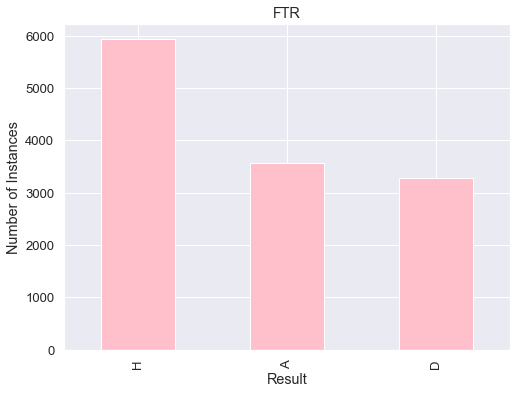

In [6]:
## Our dataset is not equal
## We have more instances of Home Win so there is possibility that our model will be little bit 
## biased towards H label.

plt.xlabel('Result')
plt.ylabel('Number of Instances')

plt.title('FTR')
plt.grid()

dataset["FTR"].value_counts().plot(kind = "bar" , figsize = (8 , 6) , grid = True , color = ["pink"])

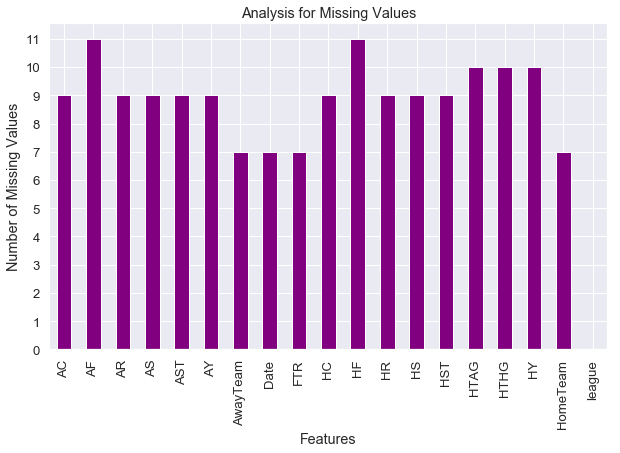

In [7]:
## As we cam see that Almost every column has NaN values
## Total number of rows = 12789
## As we can see from dataset.info() that how many non null values we have.

plt.xlabel('Features')
plt.ylabel('Number of Missing Values')

plt.title('Analysis for Missing Values')



dataset.isna().sum().plot(kind = "bar" , figsize = (10 , 6) , grid = True , color = ["purple"] , 
                          yticks = (np.arange(0, 12, step=1)))



In [8]:
## Lets just see which rows have NaN values

null_columns = dataset.columns[dataset.isnull().any()]

dataset[dataset.isnull().any(axis=1)][null_columns]

,AC,AF,AR,AS,AST,AY,AwayTeam,Date,FTR,HC,HF,HR,HS,HST,HTAG,HTHG,HY,HomeTeam
5620,5.0,NaN,0.0,6.0,3.0,3.0,Marseille,18/09/11,H,3.0,NaN,0.0,10.0,5.0,0.0,2.0,0.0,Lyon
5733,1.0,NaN,0.0,9.0,3.0,5.0,Nancy,17/12/11,A,8.0,NaN,0.0,9.0,1.0,1.0,0.0,2.0,Caen
7082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7408,NaN,NaN,NaN,NaN,NaN,NaN,Lyon,16/04/17,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bastia
9363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11298,NaN,NaN,NaN,NaN,NaN,NaN,Roma,23/09/12,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cagliari
11644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11894,5.0,16.0,0.0,10.0,1.0,5.0,Juventus,02/03/15,D,1.0,11.0,1.0,8.0,3.0,0.0,0.0,NaN,Roma


In [9]:
## As we can see that rows which are completely empty except league column which 
## will give us nothing if there is no HomeTeam, AwayTeam, FTR etc.

## Indices of almost empty rows are: 7082 , 9363 , 11644 , 11645 , 11646 , 12027 , 12408
## So we should drop these rows.

dataset = dataset.drop([7082 , 9363 , 11644 , 11645 , 11646 , 12027 , 12408])

In [10]:
## Now checking again for rows ccontaing NaN values
dataset[dataset.isnull().any(axis=1)][null_columns]

,AC,AF,AR,AS,AST,AY,AwayTeam,Date,FTR,HC,HF,HR,HS,HST,HTAG,HTHG,HY,HomeTeam
5620,5.0,NaN,0.0,6.0,3.0,3.0,Marseille,18/09/11,H,3.0,NaN,0.0,10.0,5.0,0.0,2.0,0.0,Lyon
5733,1.0,NaN,0.0,9.0,3.0,5.0,Nancy,17/12/11,A,8.0,NaN,0.0,9.0,1.0,1.0,0.0,2.0,Caen
7408,NaN,NaN,NaN,NaN,NaN,NaN,Lyon,16/04/17,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bastia
11298,NaN,NaN,NaN,NaN,NaN,NaN,Roma,23/09/12,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cagliari
11894,5.0,16.0,0.0,10.0,1.0,5.0,Juventus,02/03/15,D,1.0,11.0,1.0,8.0,3.0,0.0,0.0,NaN,Roma
12426,7.0,21.0,0.0,15.0,5.0,2.0,Pescara,28/08/16,A,2.0,12.0,0.0,13.0,3.0,NaN,NaN,2.0,Sassuolo


In [11]:
## We can see that row numbers(index label) 7408 and 11298 contains only HomeTeam, AwayTeam and Date values.
## We are dropping that too

## Also we are not using AF and HF so row numbers(index label) 5620 and 5733 won't bother us.
## We are also not considering HY so row numbers(index label) 11894 won't bother us.

## for index label 12426 HTAG and HTHG are Null, since the FTR is A that means that there is a possibility that 
## in half time AwayTeam goals are more than HomeTeam, But it is also possible that the HomeTeam Sccored well 
## in the second half, To be fair with our model lets assign both 0.0 and 0.0

dataset = dataset.drop([7408 , 11298])
dataset['HTAG'] = dataset['HTAG'].fillna(0.0)
dataset['HTHG'] = dataset['HTHG'].fillna(0.0)
dataset = dataset.reset_index(drop = True)

## Fetaure Selection and Fetaure Extraction

In [12]:
## Feature Extraction:
## I am creating one more feature from already existing features named GoalDifference.
## GoalDifference is the ccolumn that contains absolute value of difference between HTAG and HTHG.
## If the GoalDifference is 0 then there is a high possibility that match can be draw.
## If its not empty then maybe we will get one winner.

dataset["GoalDifference"] = dataset.apply(lambda x : abs(x.HTHG - x.HTAG) , axis = 1)

In [13]:
## Feature Selection

## Features that we are considering are:
## HomeTeam , AwayTeam , HTHG , HTAG , HS , AS , HST , AST , HC , AC , HR , AR , league and GoalDifference
dataset = dataset[["HomeTeam" , "AwayTeam" , "HTHG" , "HTAG" , "HS" , "AS" , "HST" , "AST" , 
                   "AC" , "HC" , "HR" , "AR" , "league" , "GoalDifference" , "FTR"]]

In [14]:
dataset.head()

,HomeTeam,AwayTeam,HTHG,HTAG,HS,AS,HST,AST,AC,HC,HR,AR,league,GoalDifference,FTR
0,Wolfsburg,Stuttgart,0.0,0.0,13.0,14.0,7.0,4.0,3.0,6.0,0.0,0.0,bundesliga,0.0,H
1,Dortmund,FC Koln,0.0,0.0,24.0,7.0,11.0,0.0,1.0,16.0,0.0,0.0,bundesliga,0.0,H
2,Hertha,Hannover,0.0,0.0,10.0,15.0,4.0,3.0,3.0,5.0,0.0,0.0,bundesliga,0.0,H
3,Hoffenheim,Bayern Munich,1.0,1.0,9.0,9.0,1.0,3.0,10.0,3.0,0.0,0.0,bundesliga,0.0,D
4,Mainz,Leverkusen,1.0,2.0,8.0,13.0,4.0,7.0,5.0,3.0,0.0,0.0,bundesliga,1.0,D


In [15]:
def label_fix(label):
    
    if label == "H":
        
        return 2
    
    elif label == "D":
        
        return 0
    
    else:
        
        return 1



In [16]:
dataset["FTR"] = dataset["FTR"].apply(label_fix)

In [17]:
dataset.head()

,HomeTeam,AwayTeam,HTHG,HTAG,HS,AS,HST,AST,AC,HC,HR,AR,league,GoalDifference,FTR
0,Wolfsburg,Stuttgart,0.0,0.0,13.0,14.0,7.0,4.0,3.0,6.0,0.0,0.0,bundesliga,0.0,2
1,Dortmund,FC Koln,0.0,0.0,24.0,7.0,11.0,0.0,1.0,16.0,0.0,0.0,bundesliga,0.0,2
2,Hertha,Hannover,0.0,0.0,10.0,15.0,4.0,3.0,3.0,5.0,0.0,0.0,bundesliga,0.0,2
3,Hoffenheim,Bayern Munich,1.0,1.0,9.0,9.0,1.0,3.0,10.0,3.0,0.0,0.0,bundesliga,0.0,0
4,Mainz,Leverkusen,1.0,2.0,8.0,13.0,4.0,7.0,5.0,3.0,0.0,0.0,bundesliga,1.0,0


In [18]:
## Lets convert into X_data and Y_data

unscaled_X_data = dataset.drop("FTR" , axis = 1)
y_labels = dataset["FTR"]

## Here I did encoding of categorical variables in both Label Encoding and One Hot Encoding methods.

## In the TensorFlow Model I will be using OneHotEncoding only.

In [19]:
## One of the most difficult task in Data Preprocessing is handling Categorical data (data which is not numerical).

## We will try both Label Encoding and One Hot Encoding



## Label Encoding
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

le_X_data_df = unscaled_X_data.copy()
le_X_data_df["HomeTeam"] = labelEncoder.fit_transform(le_X_data_df["HomeTeam"])
le_X_data_df["AwayTeam"] = labelEncoder.fit_transform(le_X_data_df["AwayTeam"])
le_X_data_df["league"] = labelEncoder.fit_transform(le_X_data_df["league"])


## One Hot Encoding
from sklearn.preprocessing  import OneHotEncoder

oneHotEncoder = OneHotEncoder()

ohe_X_data_df = unscaled_X_data.copy()
ohe_X_data_df = pd.get_dummies(ohe_X_data_df , columns = ["HomeTeam" , "AwayTeam" , "league"] , 
                                prefix = ["HomeTeam" , "AwayTeam" , "league"])

ohe_X_data_array = unscaled_X_data.copy()


ohe_X_data_array = pd.get_dummies(ohe_X_data_array , columns = ["HomeTeam" , "AwayTeam" , "league"]).as_matrix()



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [20]:
# ohe_X_data_array = unscaled_X_data.copy()

# columns_to_encode = ["HomeTeam" , "AwayTeam" , "league"]
# encoded_columns = oneHotEncoder.fit_transform(ohe_X_data_array[columns_to_encode])



In [21]:
# ohe_X_data_array = unscaled_X_data.copy()

# columns_to_encode = ["HomeTeam" , "AwayTeam" , "league"]

# numerical_columns = ohe_X_data_array[["HTHG" , "HTAG" , "HS" , "AS" , "HST" , "AST" , 
#                    "AC" , "HC" , "HR" , "AR" , "GoalDifference"]]

# encoded_columns = oneHotEncoder.fit_transform(ohe_X_data_array[columns_to_encode])
# processed_data = np.concatenate([numerical_columns, encoded_columns], axis=1)



In [22]:
## Lets see the shapes of our dataset.

print("Shape of le_dataset_df : " , le_X_data_df.shape)
print("Shape of ohe_dataset_df : " , ohe_X_data_df.shape)
print("Shape of ohe_dataset_arrayy : " , ohe_X_data_array.shape)

Shape of le_dataset_df :  (12780, 14)
Shape of ohe_dataset_df :  (12780, 334)
Shape of ohe_dataset_arrayy :  (12780, 334)


In [23]:
ohe_X_data_df.iloc[1 , :]

HTHG                       0.0
HTAG                       0.0
HS                        24.0
AS                         7.0
HST                       11.0
AST                        0.0
AC                         1.0
HC                        16.0
HR                         0.0
AR                         0.0
GoalDifference             0.0
HomeTeam_Ajaccio           0.0
HomeTeam_Ajaccio GFCO      0.0
HomeTeam_Alaves            0.0
HomeTeam_Almeria           0.0
HomeTeam_Angers            0.0
HomeTeam_Arles             0.0
HomeTeam_Arsenal           0.0
HomeTeam_Aston Villa       0.0
HomeTeam_Atalanta          0.0
HomeTeam_Ath Bilbao        0.0
HomeTeam_Ath Madrid        0.0
HomeTeam_Augsburg          0.0
HomeTeam_Auxerre           0.0
HomeTeam_Barcelona         0.0
HomeTeam_Bari              0.0
HomeTeam_Bastia            0.0
HomeTeam_Bayern Munich     0.0
HomeTeam_Betis             0.0
HomeTeam_Birmingham        0.0
                          ... 
AwayTeam_Stoke             0.0
AwayTeam

In [24]:
## Saving the Label Encoded and One Hot Encoded datasets to machine as CSV Files

le_X_data_df.to_csv('/Users/jaskirat/Desktop/Numerical_Data_le.csv', header = False)
ohe_X_data_df.to_csv('/Users/jaskirat/Desktop/Numerical_Data_ohe.csv', header = False)

In [25]:
## Loading that CSV files in numpy ndarray format

numerical_input_data_le = np.loadtxt('/Users/jaskirat/Desktop/Numerical_Data_le.csv' , delimiter = ',').astype(np.float32)
numerical_input_data_ohe = np.loadtxt('/Users/jaskirat/Desktop/Numerical_Data_ohe.csv' , delimiter = ',').astype(np.float32)

In [26]:
unscaled_inputs_all_le = numerical_input_data_le[:,1:]
unscaled_inputs_all_ohe = numerical_input_data_ohe[:,1:]

In [27]:
type(unscaled_inputs_all_le)

numpy.ndarray

In [28]:
## Lets convert y_labels from pandas series to numpy array 

y_labels = y_labels.values
type(y_labels)

numpy.ndarray

## Preprocessing our data.

In [29]:
## Lets scale out input array

from sklearn import preprocessing

scaled_inputs_le = preprocessing.scale(unscaled_inputs_all_le)
scaled_inputs_ohe = preprocessing.scale(unscaled_inputs_all_ohe)




/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were enc

In [30]:
scaled_inputs_le[0]

array([ 1.6062824 ,  1.1611217 , -0.8295379 , -0.69307387, -0.20521516,
        0.6108474 ,  0.6027313 , -0.07106111, -0.58016485,  0.06934791,
       -0.3158928 , -0.37080377, -1.504647  , -0.95171595], dtype=float32)

## Here I am shuffling our data

In [31]:
## Lets shuffle out data

shuffled_indices = np.arange(scaled_inputs_le.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs_le = scaled_inputs_le[shuffled_indices]
shuffled_targets = y_labels[shuffled_indices]


shuffled_indices = np.arange(scaled_inputs_ohe.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs_ohe = scaled_inputs_ohe[shuffled_indices]
shuffled_targets = y_labels[shuffled_indices]

## Splitting Our Dataset into Train set , Validate set and Test set.
## The ratio is 80:10:10

In [32]:
## SPLIT the dataset into TRAIN , TEST AND VALID Datasets

samples_count = shuffled_inputs_le.shape[0]
train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)
test_samples_count = samples_count - train_samples_count - validation_samples_count

In [33]:
print(train_samples_count , test_samples_count , validation_samples_count)

10224 1278 1278


In [34]:
train_inputs_le = shuffled_inputs_le[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

validation_inputs_le = shuffled_inputs_le[train_samples_count : train_samples_count + validation_samples_count]
validation_targets = shuffled_targets[train_samples_count : train_samples_count + validation_samples_count]

test_inputs_le = shuffled_inputs_le[train_samples_count + validation_samples_count : ]
test_targets = shuffled_targets[train_samples_count + validation_samples_count : ]



train_inputs_ohe = shuffled_inputs_ohe[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

validation_inputs_ohe = shuffled_inputs_ohe[train_samples_count : train_samples_count + validation_samples_count]
validation_targets = shuffled_targets[train_samples_count : train_samples_count + validation_samples_count]

test_inputs_ohe = shuffled_inputs_ohe[train_samples_count + validation_samples_count : ]
test_targets = shuffled_targets[train_samples_count + validation_samples_count : ]

## Here I am saving the dataset in .npz format

In [35]:
### SAVE THE DATASET IN NPZ FORMAT

np.savez('SAHAJ_MODEL_TRAIN_LE' , inputs = train_inputs_le , targets = train_targets)
np.savez('SAHAJ_MODEL_VALIDATION_LE' , inputs = validation_inputs_le , targets = validation_targets)
np.savez('SAHAJ_MODEL_TEST_LE' , inputs = test_inputs_le , targets = test_targets)

### SAVE THE DATASET IN NPZ FORMAT

np.savez('SAHAJ_MODEL_TRAIN_OHE' , inputs = train_inputs_ohe , targets = train_targets)
np.savez('SAHAJ_MODEL_VALIDATION_OHE' , inputs = validation_inputs_ohe , targets = validation_targets)
np.savez('SAHAJ_MODEL_TEST_OHE' , inputs = test_inputs_ohe , targets = test_targets)

## This class is responsible is for getting next batch of data.

In [36]:
## This class is responsible for getting next batch of data


class Mir_Model_Reader():
    
    def __init__(self , dataset , batch_size = None):
    
        npz = np.load('SAHAJ_MODEL_{0}.npz'.format(dataset))
        self.inputs , self.targets = npz['inputs'].astype(np.float) , npz['targets'].astype(np.int)

        if batch_size is None:
            self.batch_size = self.inputs.shape[0]
        else:
            self.batch_size = batch_size
        
        self.curr_batch = 0
        self.batch_count = self.inputs.shape[0] // self.batch_size
    
    
    def __next__(self):
        
        if self.curr_batch >= self.batch_count:
            self.curr_batch = 0
            raise StopIteration()

        batch_slice =slice(self.curr_batch * self.batch_size , (self.curr_batch + 1) * self.batch_size)
        input_batch = self.inputs[batch_slice]
        target_batch = self.targets[batch_slice]
        self.curr_batch += 1
        
        classes_num = 3
        targets_one_hot = np.zeros((target_batch.shape[0] , classes_num))
        targets_one_hot[range(target_batch.shape[0]) , target_batch] = 1
#         print(targets_one_hot)
        
        return input_batch , targets_one_hot
    
    
    def __iter__(self):
        
        return self

In [37]:
print(train_inputs_ohe.shape)
print(train_inputs_le.shape)

(10224, 334)
(10224, 14)


## Initializing HyperParameters

### Here values that I am initializing are:

### Hidden Layer size = 700 neurons.
### Number of Hidden Layers are 3, total 5 layers including Input and Output Layer.
### I am using Relu(Rectified Linear Unit) as my activation function.
### Learning rate is pretty small = 0.00001.
### Batch size = 1 as it is similar to Stochastic Gradient Descent.
### For Optimizer I am using Adam Optimizer.

In [38]:
input_size = 334
output_size = 3
hidden_layer_size = 700

In [39]:
import tensorflow as tf

tf.reset_default_graph()

In [40]:
inputs = tf.placeholder(tf.float32 , [None , input_size])
targets = tf.placeholder(tf.int32 , [None , output_size])

In [41]:
weights_1 = tf.get_variable("weights_1" , [input_size , hidden_layer_size])
biases_1 = tf.get_variable("biases_1" , [hidden_layer_size])
# tf.cast(inputs , tf.float32)
# tf.cast(weights_1 , tf.float32)
output1 = tf.nn.relu(tf.matmul(inputs , weights_1) + biases_1)

weights_2 = tf.get_variable("weights_2" , [hidden_layer_size , hidden_layer_size])
biases_2 = tf.get_variable("biases_2" , [hidden_layer_size])
# tf.cast(output1 , tf.float32)
# tf.cast(weights_2 , tf.float32)
output2 = tf.nn.relu(tf.matmul(output1 , weights_2) + biases_2)

weights_3 = tf.get_variable("weights_3" , [hidden_layer_size , hidden_layer_size])
biases_3 = tf.get_variable("biases_3" , [hidden_layer_size])
# tf.cast(output2 , tf.float32)
# tf.cast(weights_3 , tf.float32)
output3 = tf.nn.relu(tf.matmul(output2 , weights_3) + biases_3)

weights_4 = tf.get_variable("weights_4" , [hidden_layer_size , hidden_layer_size])
biases_4 = tf.get_variable("biases_4" , [hidden_layer_size])
# tf.cast(output3 , tf.float32)
# tf.cast(weights_4 , tf.float32)
output4 = tf.nn.relu(tf.matmul(output3 , weights_4) + biases_4)


weights_5 = tf.get_variable("weights_5" , [hidden_layer_size , output_size])
biases_5 = tf.get_variable("biases_5" , [output_size])

# tf.cast(output4 , tf.float32)
# tf.cast(weights_5 , tf.float32)

outputs = tf.matmul(output4 , weights_5) + biases_5
# tf.cast(outputs , tf.float32)
# tf.cast(targets , tf.float32)

loss = tf.nn.softmax_cross_entropy_with_logits(logits = outputs , labels = targets)
mean_loss = tf.reduce_mean(loss)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [42]:
optimize = tf.train.AdamOptimizer(learning_rate = 0.00001).minimize(mean_loss)
out_equal_targets = tf.equal(tf.argmax(outputs , 1) , tf.argmax(targets,1))
accuracy = tf.reduce_mean(tf.cast(out_equal_targets , tf.float32))

In [43]:
sess = tf.InteractiveSession()
initializer = tf.global_variables_initializer()
sess.run(initializer)

In [44]:
batch_size = 1
max_epochs = 200
prev_validation_loss = 9999999.0

## To avoid Overfitting:
## Here the logic is that as soon as the current Validation loss is greater than the previous Validation loss, it will stop Training.

In [45]:
train_data = Mir_Model_Reader('TRAIN_OHE' , batch_size)
validation_data = Mir_Model_Reader('VALIDATION_OHE')

for epoch_counter in range(max_epochs):
    curr_epoch_loss = 0.
    for input_batch , target_batch in train_data:
        _,batch_loss = sess.run([optimize , mean_loss] , 
                               feed_dict = {inputs : input_batch , targets : target_batch})#.reshape(250 , 1)})
        curr_epoch_loss += batch_loss
    curr_epoch_loss /= train_data.batch_count
    
    validation_loss = 0.
    validation_accuracy = 0.
    
    for input_batch , target_batch in validation_data:
        validation_loss , validation_accuracy = sess.run([mean_loss , accuracy] , 
                                                        feed_dict = {inputs : input_batch , targets : target_batch})#.reshape(2205 , 1)})
        
    print('Epoch' + str(epoch_counter + 1) + '.Training Loss : '+' {0:.3f}'.format(curr_epoch_loss) + '.Validation Loss:'+'{0:.3f}'.format(validation_loss) + '.Validation Accuracy:'+'{0:.2f}'.format(validation_accuracy * 100.) + '%')
    
    if validation_loss > prev_validation_loss:
        break
        
    prev_validation_loss = validation_loss
print("\nEND OF TRAINING")



Epoch1.Training Loss :  0.916.Validation Loss:0.844.Validation Accuracy:59.23%
Epoch2.Training Loss :  0.742.Validation Loss:0.825.Validation Accuracy:60.41%
Epoch3.Training Loss :  0.679.Validation Loss:0.835.Validation Accuracy:61.03%

END OF TRAINING


## Testing the model with Test data.

In [46]:
### TEST THE MODEL

test_data = Mir_Model_Reader('TEST_OHE')

# for input_batch , target_batch in test_data:
#     test_accuracy = sess.run([accuracy] , feed_dict = {inputs : input_batch , targets : target_batch})

# test_accuracy_percent = test_accuracy[0] * 100

# print('Test Accuracy : ' + '{0:.2f}'.format(test_accuracy_percent) + '%' )

for input_batch , target_batch in test_data:
    test_accuracy = sess.run([accuracy] , feed_dict = {inputs : input_batch , targets : target_batch})#.reshape(2207 , 1)})

test_accuracy_percent = test_accuracy[0] * 100

print("TEST ACCURACY : " + "{0:.2f}".format(test_accuracy_percent) + "%")


TEST ACCURACY : 62.91%


## Checking model predictions 

In [47]:
test_data = Mir_Model_Reader('TEST_OHE')
# listt = []
for input_batch , target_batch in test_data:
    feed_dict = {inputs : input_batch}
    predictions = outputs.eval(feed_dict)
    print(predictions)

[[ 0.5845328   0.71332866 -0.8107593 ]
 [ 0.17708553 -0.6569481   1.0927639 ]
 [-0.38806647 -2.2611864   3.0816445 ]
 ...
 [-0.23687325  1.349271   -1.5381019 ]
 [-0.05811357 -0.668067    0.9601168 ]
 [ 0.8398417  -0.7201295   0.7774839 ]]


### I am using softmax as my activation function on output layer which gives us the probability of eacch class that the model has predicted it can be.

### Now to get the value of maximum probability I am using argmax function.

In [48]:
test_data = Mir_Model_Reader('TEST_OHE')
for input_batch , target_batch in test_data:
    classification = sess.run(tf.argmax(outputs, 1), feed_dict={inputs: input_batch})
    test_set = pd.DataFrame(target_batch)
    predictions = pd.DataFrame(classification)

In [49]:
classification

array([1, 2, 2, ..., 1, 2, 0])